<h1>🎓 Trabajo Integrador Final</h1>

<h2>Integrantes</h2>
<ul>
  <li></li>
  <li></li>
  <li>Evers Juan Segundo</li>
  <li>Kelechian Leonardo</li>
</ul>

<h2>Introducción</h2>
<p>[...]</p>

<hr>

<h3>Importamos las librerias que usaremos durante el proyecto</h3>

In [ ]:
# Conexión con Google Drive
# from google.colab import drive
# import os

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Estadísticos
from scipy import stats

# PreProcesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, average_precision_score

<h3>Conectamos Google Drive y cargamos el dataset</h3>

In [ ]:
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# elegir la carpeta donde estan las bases de datos:
# ruta_base = "/content/drive/MyDrive/"
# ruta_laboratorio = os.path.join(ruta_base, "Laboratorio de Ciencia de Datos")
# ruta_bases_datos = os.path.join(ruta_laboratorio, "Bases de Datos")

# # elegir la base de datos que quiero usar:
# ruta_archivo = os.path.join(ruta_bases_datos, "Grupo 3 - Abandono de Clientes.csv")
ruta_archivo = "data/Grupo 3 - Abandono de Clientes.csv"

In [4]:
#Cargar el dataset
data = pd.read_csv(ruta_archivo, sep=',', encoding='utf-8')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Hacemos una primera vista a nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##⚙️ Preparación de los datos

<b><h3>Limpieza de datos<h3>

Antes de arrancar, tenemos que corroborar que los datos se encuentren limpios de forma tal que no afecten negativamente al modelo.

Luego de realizar un pequeño análisis univariado a las columnas de nuestro data set, encontramos que la columna `TotalCharges` era de tipo *object* cuando esta debería ser *float*. Entonces, la casteamos y encontramos también que escondía un par de valores nulos.

In [ ]:
# Crear una copia del DataFrame para no modificar el original
df_mod = data.copy()

# Convertir TotalCharges a tipo numérico (float) y manejar errores
df_mod['TotalCharges'] = pd.to_numeric(df_mod['TotalCharges'], errors='coerce')

# Revisar valores faltantes o nulos en TotalCharges
print(f"Cantidad de filas con valor nulo en 'Total Charges': {df_mod['TotalCharges'].isnull().sum()}");


Cantidad de filas con valor nulo en 'Total Charges': 11


Como vemos, ahora existen 11 filas con valor nulo en esta variable. Si bien no son muchos valores, podríamos eliminarlos y es posible que el resultado final no varíe tanto, pero, decidimos que con el propósito de mantener todos los datos originales, se realizará una **Imputación por la mediana**.


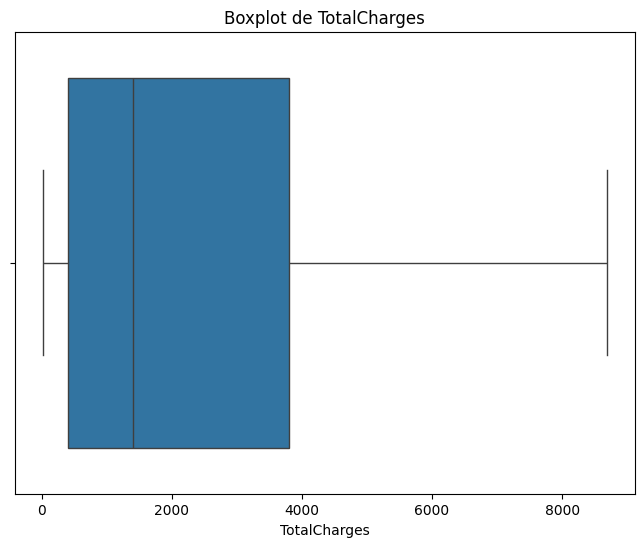

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mod['TotalCharges'])
plt.title('Boxplot de TotalCharges')
plt.show()

Este boxplot nos ayuda a terminar de decidir si era una buena opción el uso de la mediana para la imputación y vemos rapidamente que hay un sesgo positivo, lo que hace que la media no sea tan representativa y pierda robustez como medida de resumen.

In [ ]:
# Imputación con la mediana
mediana_TotalCharges = df_mod['TotalCharges'].median()
df_mod['TotalCharges'] = df_mod['TotalCharges'].fillna(mediana_TotalCharges)

# Vemos como ahora no hay falores faltantes
print(f"Cantidad de filas con valor nulo en 'Total Charges': {df_mod['TotalCharges'].isnull().sum()}");

Cantidad de filas con valor nulo en 'Total Charges': 0


Ahora si, la variable `TotalCharges` ya se encuentra en el tipo de dato correcto y con sus valores nulos tratados.

Luego, el resto de las variables del dataset no requieren ningún cambio de tipo de dato, limpieza o tratamiento de outliers.

---


## 🔎 Busqueda de Modelo Base

Realizamos entrenamiento de modelos varios para ver cual elegimos y así realizar una busqueda de hiperparámetros

Hay que tener cuidado con esto ya que hay modelos que no necesitan estandarizacion como:

- Árboles de decisión
- Random Forest
- Gradient Boosting (XGBoost, LightGBM, HistGradientBoosting)

Pero luego los siguientes modelos si necesitan estandarización:
- Regresión Logística
- SVM (especialmente con kernel RBF o polinómico)

Entonces…
- Las métricas de SVM y Regresión Logística ahora son confiables hasta cierto punto, pero probablemente mejorarían con los datos estandarizados.

- Es posible que SVM con RBF haya rendido tan mal justamente por esto.

Por ende, dividiremos esta busqueda en dos fases:
- Comparación rápida sin procesar -> Donde solo confiaremos en las métricas de los modelos de árboles
- Comparación con estandarización -> Usaremos la misma función pero solo con los modelos sensibles a las escalas y el data set previamente estandarizado

Por ultimo, compararemos resultados.

### 🔍 Fase 1 - Comparación rápida sin procesar

In [6]:
#Esta función agarraria la BBDD sin realizar transformaciones y luego nos devuelve las métricas de cada modelo puesto
def evaluar_modelos(X_train, y_train, X_test, y_test):
    modelos = {
        #Estos son "tweaks iniciales seguros" que no se consideran tuning agresivo, sino buenas prácticas para establecer un baseline justo
        'Regresión Logística': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'HistGradientBoosting': HistGradientBoostingClassifier(),
        'XGBoost': XGBClassifier(eval_metric='logloss', scale_pos_weight=2.773, use_label_encoder=False), #scale_pos_weight = 'Churn' 73.5% (yes) / 26.5% (no) = 2.773
        'LightGBM': LGBMClassifier(verbose=-1, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        'SVM_linear': SVC(kernel = 'linear', class_weight='balanced'),
        'SVM_rbf': SVC(kernel = 'rbf', class_weight='balanced')
    }

    resultados = []

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        # Asegurarse de que el modelo tiene el atributo predict_proba antes de usarlo
        if hasattr(modelo, "predict_proba"):
            y_proba = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, "decision_function"):
            y_proba = modelo.decision_function(X_test)
        else:
            y_proba = None


        resultados.append({
            'Modelo': nombre,
            'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred), #Calcula el promedio de recall entre clases (recall clase 0 y clase 1).
            'F1 Score': f1_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred), #Indica cuántos de los que realmente se fueron (churn=1) tu modelo detectó.
            'Precision': precision_score(y_test, y_pred),
            # 'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
            #PR AUC
            'PR AUC': average_precision_score(y_test,y_proba) if y_proba is not None else None #es más informativa cuando te interesa detectar bien la clase 1.
        })

    return pd.DataFrame(resultados).sort_values(by='Balanced Accuracy', ascending=False).reset_index(drop=True)

In [7]:
# Elimino costumerID
df_inicial = df_mod.copy()
df_inicial.drop(columns='customerID', inplace=True)

# Realizamos modificaciones rapidas porque nuestros modelos necesitan variables numericas
binary_cols_quick = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Variables categóricas con más de dos opciones (ajusta la lista si es necesario)
categorical_cols_quick = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                          'Contract', 'PaymentMethod']

# Aplicar codificación binaria a las columnas Yes/No
for col in binary_cols_quick:
    if col in df_inicial.columns:
        if df_inicial[col].dtype == 'object': # Solo codificar si son strings
             # Manejar el caso de 'No internet service' o 'No phone service' si aplica
            df_inicial[col] = df_inicial[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


# Aplicar One-Hot Encoding a las columnas con más de dos opciones
df_inicial = pd.get_dummies(df_inicial, columns=categorical_cols_quick, drop_first=True)

# Convertir las nuevas columnas booleanas a enteros (si pd.get_dummies las crea como bool)
bool_cols_quick = df_inicial.select_dtypes(include='bool').columns
df_inicial[bool_cols_quick] = df_inicial[bool_cols_quick].astype(int)

#Convertimos tambien la variable objetivo
df_inicial['Churn'] = df_inicial['Churn'].replace({'Yes': 1, 'No': 0})

# --- Fin de la codificación rápida ---




NameError: name 'df_mod' is not defined

In [ ]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df_inicial.drop(columns = 'Churn'),
                                        df_inicial['Churn'],
                                        random_state = 22
                                    )

In [ ]:
# Evaluamos los modelos inciales
# ==============================================================================
df_resultados = evaluar_modelos(X_train, y_train, X_test, y_test)
df_resultados

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:42:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Modelo,Balanced Accuracy,F1 Score,Recall,Precision,PR AUC
0,SVM_linear,0.755256,0.633628,0.733607,0.557632,0.642409
1,LightGBM,0.754522,0.634633,0.717213,0.569106,0.652196
2,Regresión Logística,0.749961,0.623116,0.762295,0.526912,0.648783
3,XGBoost,0.724792,0.598485,0.647541,0.556338,0.619064
4,HistGradientBoosting,0.697215,0.563218,0.502049,0.641361,0.638931
5,Random Forest,0.662669,0.503704,0.418033,0.633540,0.609118
6,SVM_rbf,0.621529,0.464738,0.526639,0.415858,0.505014


### Fase 2 - Comparación con estandarización

Utilizamos el mismo split de datos de antes...

In [ ]:
# Variables a escalar
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo con datos de entrenamiento
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

Ajustamos la otra función para entrenar nuevamente pero sin los arboles...

In [ ]:
def evaluar_modelos_estandarizados(X_train, y_train, X_test, y_test):
    modelos = {
        #Estos son "tweaks iniciales seguros" que no se consideran tuning agresivo, sino buenas prácticas para establecer un baseline justo
        'STD - Regresión Logística': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'STD - SVM_linear': SVC(kernel = 'linear', class_weight='balanced'),
        'STD - SVM_rbf': SVC(kernel = 'rbf', class_weight='balanced')
    }

    resultados = []

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        # Asegurarse de que el modelo tiene el atributo predict_proba antes de usarlo
        if hasattr(modelo, "predict_proba"):
            y_proba = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, "decision_function"):
            y_proba = modelo.decision_function(X_test)
        else:
            y_proba = None


        resultados.append({
            'Modelo': nombre,
            'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred), #Calcula el promedio de recall entre clases (recall clase 0 y clase 1).
            'F1 Score': f1_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred), #Indica cuántos de los que realmente se fueron (churn=1) tu modelo detectó.
            'Precision': precision_score(y_test, y_pred),
            # 'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
            #PR AUC
            'PR AUC': average_precision_score(y_test,y_proba) if y_proba is not None else None #es más informativa cuando te interesa detectar bien la clase 1.
        })

    return pd.DataFrame(resultados).sort_values(by='Balanced Accuracy', ascending=False).reset_index(drop=True)

In [ ]:
# Evaluamos los modelos inciales
# ==============================================================================
df_resultados_std = evaluar_modelos_estandarizados(X_train_scaled, y_train, X_test_scaled, y_test)
df_resultados_std

,Modelo,Balanced Accuracy,F1 Score,Recall,Precision,PR AUC
0,STD - SVM_rbf,0.755836,0.632214,0.752049,0.545319,0.608107
1,STD - Regresión Logística,0.750986,0.624268,0.764344,0.527581,0.647927
2,STD - SVM_linear,0.738570,0.604900,0.809426,0.482885,0.621324


---

###Comparación de resultados

In [ ]:
df_resultados['Datos'] = 'Sin escalar'
df_resultados_std['Datos'] = 'Estandarizados'
df_todos = pd.concat([df_resultados, df_resultados_std], ignore_index=True)
df_todos_ordenado = df_todos.sort_values(by='Balanced Accuracy', ascending=False).reset_index(drop=True)

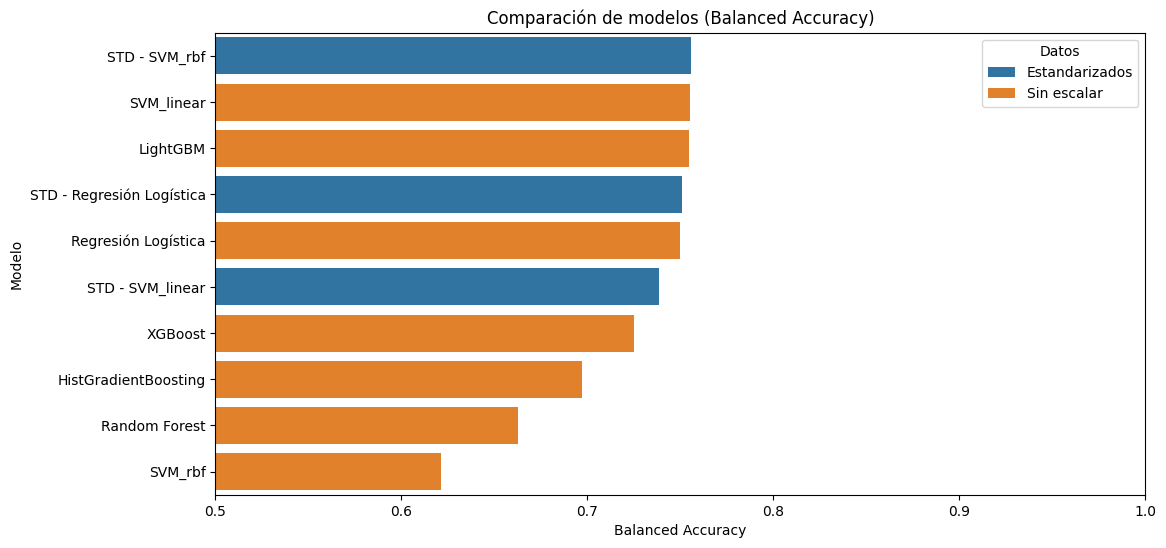

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_todos_ordenado, x='Balanced Accuracy', y='Modelo', hue='Datos')
plt.title('Comparación de modelos (Balanced Accuracy)')
plt.xlim(0.5, 1.0)  # si querés limitar el eje x para enfocar
plt.show()


<h3>Conclusión</h3>


* ✅ El modelo con mejor rendimiento general fue el `SVM_rbf` estandarizado, alcanzando la mayor Balanced Accuracy entre todos los modelos comparados.
* 🌳 El modelo `lightGBM` fue el que mejor accuracy tuvo de todos los árboles, teniendo casi el mismo valor que el SVM. Similar, solo por apenas debajo de este, se encuentra el de `Regresión Logística`. Ambos tambien podrían ser considerados como modelo final.
* ⚠️ El `SVM_linear` sin estandarizar puede no ser confiable, esto se debe a que luego de ser escalado, su accuracy es mucho menor, lo que nos hace pensar que en ese primer entrenamiento se vió sesgado por la escala de alguna variable.


Comparación de F1-Score y PR AUC para modelos seleccionados:
                      Modelo  F1 Score    PR AUC    Recall  Precision
1                   LightGBM  0.634633  0.652196  0.717213   0.569106
8  STD - Regresión Logística  0.624268  0.647927  0.764344   0.527581
7              STD - SVM_rbf  0.632214  0.608107  0.752049   0.545319


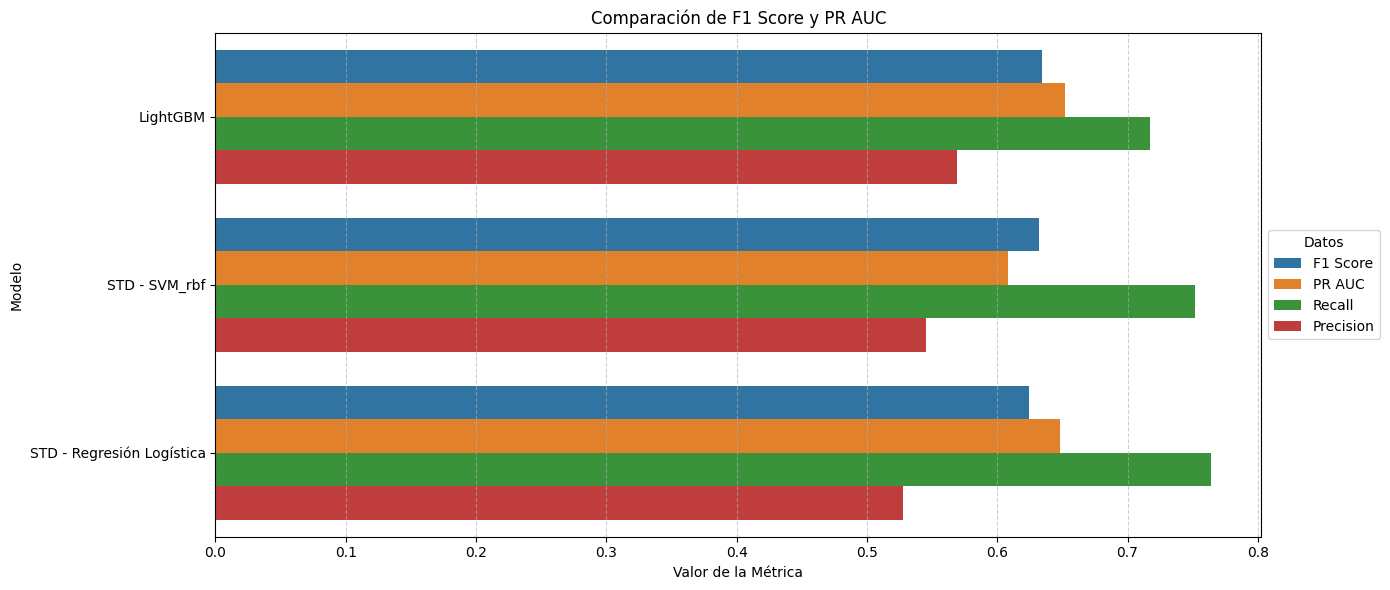

In [ ]:
# Filtrar los resultados para los modelos específicos que quieres comparar
modelos_comparar = ['STD - SVM_rbf', 'LightGBM', 'STD - Regresión Logística']

# Crear un DataFrame combinado si aún no lo tienes
# Asumiendo que df_resultados y df_resultados_std ya existen del código anterior
# Si no, deberías ejecutarlos primero.
df_resultados['Datos'] = 'Sin escalar'
df_resultados_std['Datos'] = 'Estandarizados'
df_todos = pd.concat([df_resultados, df_resultados_std], ignore_index=True)

# Filtrar el DataFrame combinado para incluir solo los modelos deseados
df_comparacion_especifica = df_todos[df_todos['Modelo'].isin(modelos_comparar)]

# Seleccionar solo las columnas relevantes para la comparación de métricas
df_metricas_comparacion = df_comparacion_especifica[['Modelo', 'F1 Score', 'PR AUC','Recall','Precision']]

# Mostrar las métricas
print("Comparación de F1-Score y PR AUC para modelos seleccionados:")
print(df_metricas_comparacion.sort_values(by='PR AUC', ascending=False))

# Opcionalmente, puedes visualizar esta comparación
df_melted = df_metricas_comparacion.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_melted, x='Valor', y='Modelo', hue='Métrica')
plt.title('Comparación de F1 Score y PR AUC')
plt.xlabel('Valor de la Métrica')
plt.ylabel('Modelo')
# plt.legend(title='Métrica') # Elimina o comenta esta línea si usas ax.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)


ax.legend(title='Datos', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()


| Métrica                                       | ¿Qué mide?                                                                                       | ¿Por qué importa en tu caso?                                                                                            |
| --------------------------------------------- | ------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------- |
| **Balanced Accuracy**                         | Promedio de recall entre clase 0 y 1. No se deja engañar por el desbalance.                      | Te dice si el modelo aprende **ambas clases** en vez de acertar por casualidad.                                         |
| **Recall (o Sensibilidad)**                   | % de verdaderos positivos detectados. ¿Cuántos que realmente se fueron predijiste correctamente? | Es crítico: no querés dejar pasar clientes que se iban. Mejor tener falsos positivos que no detectarlos.                |
| **Precision**                                 | % de los que predijiste como "se va" que realmente se fueron.                                    | Complemento al recall. No querés alertar a todos si solo pocos se van.                                                  |
| **F1 Score**                                  | Promedio armonioso entre Precision y Recall.                                                     | Balance entre no asustar a todos y no perder a los que se iban.                                                         |
| **PR AUC (Área bajo curva Precision-Recall)** | Qué tan bien se comporta el modelo al clasificar la clase positiva.                              | Más útil que ROC AUC con clases desbalanceadas. Te da una idea del rendimiento **cuando te importa acertar positivos**. |


<h3>Conclusion final</h3>

Entonces, creo que el `LightGBM` porque, si bien no tiene el mayor recall (proporción de churners reales sí detectados), la precisión es la mas alta (de los que detectamos como churn, cuantos realmente lo eran). Esta ultima, si es baja, estaríamos "sobrealertando" o etiquetando como churners a muchos que en realidad no lo eran (falsos positivos).

Este balance hace que se detecten bien a los que se van (recall aceptable) y no sobreactúe marcando como "churn" a muchos que no lo son (mayor precision)

❗Pero, si nuestro objetivo fuera maximizar el recall (ej.:"prefiero contactar 10 clientes de más que perder 1 que se va") podríamos optar por la `Regresión Logística`.

Si la prioridad es no perder clientes, entonces:

- `SVM_rbf` ofrece un casi idéntico recall a la `regresión logística`, pero mejora en F1 Score y precisión.

- Esto sugiere que detectamos casi los mismos casos de churn, pero con menos falsos positivos, lo cual es deseable si las acciones de retención tienen costo.

<hr>

<b><h3>Manejo de Redundancia en variables categóricas<h3>

[...]

<h3></h3>

Si la fila tiene Phone Service == 1 y Multiple Lines == 1, le asigna un 1 en la nueva columna. En caso de no tener Phone Service, o de no tener Multiple Lines, le asigna un 0. Luego, elimina la columna original.

In [ ]:
df_mod_1 = df_mod.copy()
df_mod_1['HasMultipleLines'] = ((df_mod_1['PhoneService'] == 1) & (df_mod_1['MultipleLines'] == 'Yes')).astype(int)
df_mod_1.drop(columns='MultipleLines', inplace=True)

[Lo mismo de antes pero con internet_services ...]

In [ ]:
df_mod_2 = df_mod_1.copy()
# Lista de columnas relacionadas con servicios que dependen de tener Internet
internet_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Crear nuevas variables binarias
for col in internet_services:
    new_col = 'Has' + col  # Ej: 'HasOnlineSecurity'
    df_mod_2[new_col] = ((df_mod_2['InternetService'] != 'No') & (df_mod_2[col] == 'Yes')).astype(int)

# Eliminar columnas originales
df_mod_2.drop(columns=internet_services, inplace=True)

<b><h3>Transformación de datos<h3>

[Se aplica el binary encoding a las variables binarias recien modificadas...]

In [ ]:
# Transformé variables categóricas de 3 o más opciones con el método dummy coding.
df_mod_3 = df_mod_2.copy()
# Lista de columnas categóricas a codificar
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Aplicar One-Hot Encoding
df_mod_3 = pd.get_dummies(df_mod_3, columns=categorical_cols, drop_first=True)

[...]

In [ ]:
# Todas las nuevas columnas creadas por el dummy coding son booleanas, las transformé a numéricas
df_mod_4 = df_mod_3.copy()
bool_cols = df_mod_4.select_dtypes(include='bool').columns
df_mod_4[bool_cols] = df_mod_4[bool_cols].astype(int)

[...]

In [ ]:
# Reemplazo específico para 'gender'
df_mod_5 = df_mod_4.copy()
df_mod_5['gender'] = df_mod_5['gender'].replace({'Male': 1, 'Female': 0})

# Otras variables categóricas binarias (Yes/No)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
df_mod_5[binary_cols] = df_mod_5[binary_cols].replace({'Yes': 1, 'No': 0})

<ipython-input-12-2d92dbfb88ef>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mod_5['gender'] = df_mod_5['gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-12-2d92dbfb88ef>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mod_5[binary_cols] = df_mod_5[binary_cols].replace({'Yes': 1, 'No': 0})


In [ ]:
# Elimino costumerID
df_final = df_mod_5.copy()
df_final.drop(columns='customerID', inplace=True)

<b><h3>División de Datos<h3>


Antes de aplicar cualquier transformación, debemos dividir los datos en `training` y `testing` sets para evitar un **Data Leakage**.





In [ ]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df_final.drop(columns = 'Churn'),
                                        df_final['Churn'],
                                        random_state = 22
                                    )

<b><h3>Estandarización de Datos<h3>

[...]

In [ ]:
# Variables a escalar
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo con datos de entrenamiento
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

## 🔎 Busqueda de un modelo base (Está la misma función más arriba con los datos sin transformar)

[Según el profe, podriamos simplemente probar los distintos modelos disponibles y ver cual nos da un mejor rendimiento y a partir de ese realizamos una optimización]

[Este lo copié más arriba antes de modificar los datos]

In [ ]:
def evaluar_modelos(X_train, y_train, X_test, y_test):
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000),
        'HistGradientBoosting': HistGradientBoostingClassifier(),
        'XGBoost': XGBClassifier(eval_metric='logloss'),
        'LightGBM': LGBMClassifier(verbose=-1)

    }

    resultados = []

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

        resultados.append({
            'Modelo': nombre,
            'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
        })

    return pd.DataFrame(resultados).sort_values(by='Balanced Accuracy', ascending=False).reset_index(drop=True)

In [ ]:
df_resultados = evaluar_modelos(X_train_scaled, y_train, X_test_scaled, y_test)
df_resultados


,Modelo,Balanced Accuracy,F1 Score,Recall,Precision,ROC AUC
0,Regresión Logística,0.702969,0.572406,0.514344,0.645244,0.834326
1,LightGBM,0.697454,0.563574,0.504098,0.638961,0.829293
2,HistGradientBoosting,0.697385,0.563348,0.510246,0.628788,0.832919
3,XGBoost,0.685483,0.544202,0.485656,0.618799,0.816952


##🧠 Entrenamiento del modelo

*Hablar un poco del modelo que elegimos*

In [ ]:
#
# ...

###Grid Search basado en validación cruzada

In [ ]:
#...

###Predicción y Evaluación del modelo

###Predicción de Probabilidades

*En caso de usar un modelo de ensamble, tambien podemos obtener la probabilidad que asigna el árbol de que un valor pertenezca a una clase u otra.*

In [ ]:
#...

###Importancia de Predictores

In [ ]:
#...